In [2]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

### Parameters of Mulrivariate Gaussian

In [3]:
mu_x1 = 0
mu_x2 = 0

variance_x1 = 1
variance_x2 = 4

SIGMA_x = [[variance_x1, 1], [1, variance_x2]]
MEAN_x = [mu_x1, mu_x2]
x_prior = st.multivariate_normal(MEAN_x, SIGMA_x)

In [ ]:
# Defining grid where p(x1,x2) is evaluated

_x1 = np.linspace(-4,4,50)
_x2 = np.linspace(-4,4,50)
_x1, _x2 = np.meshgrid(_x1,_x2)

x_grid = np.empty(_x1.shape + (2,))
x_grid[:, :, 0] = _x1; x_grid[:, :, 1] = _x2

In [ ]:
x_grid.shape

(50, 50, 2)

In [ ]:
# p(x1,x2) evaluated for different values of x
p_of_x = x_prior.pdf(x_grid)

### Visualizing p(x)

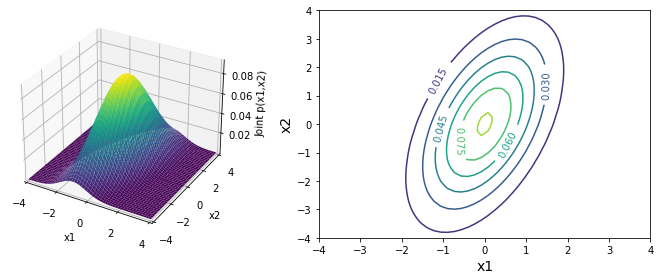

In [ ]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=plt.figaspect(0.4))
#fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(_x1, _x2, p_of_x, cmap='viridis', linewidth=0)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('Joint p(x1,x2)')

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)


ax2 = fig.add_subplot(1, 2, 2)
cp = ax2.contour(_x1, _x2, p_of_x)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.set_xlabel('x1', fontsize=14)
ax2.set_ylabel('x2', fontsize=14)

ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)

plt.tight_layout()
plt.show()

### Sampling from p(x)

In [ ]:
x_samples = x_prior.rvs(size=50)
x_samples[:10]

array([[-1.91985884, -2.86255471],
       [ 1.44617982, -0.35898736],
       [-0.8646078 ,  1.29142866],
       [ 1.14668811,  0.98370484],
       [-1.14337947,  0.07257971],
       [-0.06958224,  0.93651163],
       [-1.03999646, -0.47976122],
       [ 1.12364108,  2.80196057],
       [-1.17664926, -1.10085758],
       [ 0.12956548,  0.27677092]])

### Visualize samples of p(x)

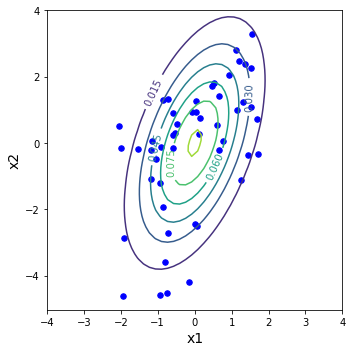

In [ ]:
%matplotlib inline

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

cp = ax1.contour(_x1, _x2, p_of_x)
ax1.clabel(cp, inline=True, fontsize=10)
ax1.scatter(x_samples[:,0], x_samples[:,1], c='b', marker='o', s=30)
ax1.set_xlabel('x1', fontsize=14)
ax1.set_ylabel('x2', fontsize=14)

plt.tight_layout()

### Question
1. Change parameters of the covariance matrix to find scenarios in which x1 and x2 random variables are independent, positively correlated and negatively correlated.



### Independent Variables
* For independent correlation the off-diagonal elements should be zero.<BR>
* The contour plot appears as concentric ellipse symmetically alligned with the coordinate axis.<BR>
* Basically it indicates that one variable(x1) does not affect other variable(x2).

### Positively Correlated Variables
* For positively correlated variable the off-diagonal terms shoulds be positive.<BR>
* The contour plot of the ellipse is tilted towards right and stretched.<BR>
* This indicates that higher the value of x1 higher is the associated value of x2.

### Negatively Correlated Variables
* For negatively correlated variable the off-diagonal terms should be negative.<BR>
* The contour plot of ellipse is tilted towards left and stretched.<BR>
* This indicates that higher the value of x1 ;ower is the associated value of x2.

In [42]:
# For independent correlation
SIGMA_independent = [[variance_x1, 0], [0, variance_x2]]

# For positive correlation
SIGMA_positive = [[variance_x1, 1], [1, variance_x2]]

# For negative correlation
SIGMA_negative = [[variance_x1, -1], [-1, variance_x2]]

In [43]:
x_prior_independent = st.multivariate_normal([mu_x1, mu_x2], SIGMA_independent)
x_prior_positive = st.multivariate_normal([mu_x1, mu_x2], SIGMA_positive)
x_prior_negative = st.multivariate_normal([mu_x1, mu_x2], SIGMA_negative)

In [44]:
_x1 = np.linspace(-4,4,50)
_x2 = np.linspace(-4,4,50)
_x1, _x2 = np.meshgrid(_x1,_x2)

x_grid = np.empty(_x1.shape + (2,))
x_grid[:, :, 0] = _x1; x_grid[:, :, 1] = _x2

In [45]:
p_of_x_independent = x_prior_independent.pdf(x_grid)
p_of_x_positive = x_prior_positive.pdf(x_grid)
p_of_x_negative = x_prior_negative.pdf(x_grid)

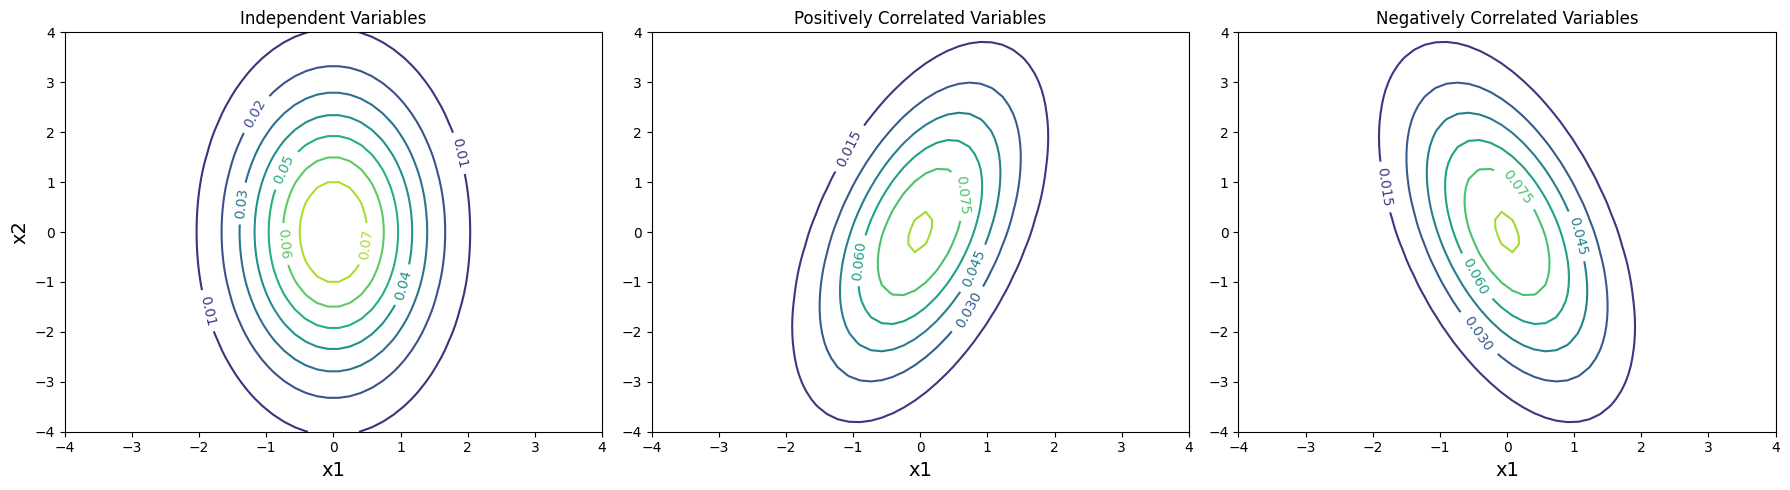

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

cp_1=axs[0].contour(_x1, _x2, p_of_x_independent)
axs[0].clabel(cp_1, inline=True, fontsize=10)
axs[0].set_title('Independent Variables')

cp_2=axs[1].contour(_x1, _x2, p_of_x_positive)
axs[0].clabel(cp_2, inline=True, fontsize=10)
axs[1].set_title('Positively Correlated Variables')

cp_3=axs[2].contour(_x1, _x2, p_of_x_negative)
axs[0].clabel(cp_3, inline=True, fontsize=10)
axs[2].set_title('Negatively Correlated Variables')

axs[0].set_xlabel('x1', fontsize=14)
axs[1].set_xlabel('x1', fontsize=14)
axs[2].set_xlabel('x1', fontsize=14)
axs[0].set_ylabel('x2', fontsize=14)

plt.tight_layout()
plt.show()

2. Are there any restrictions on the values of the covariance matrix? Discuss.

Yes, there are restriction on the values of the covariance matrix.<BR>
* The covariance matrix should be **symmetric**. Basically, the covariance matrix A[i, j] = A[j, i] for all i and j.<BR>
* The diagonal elements must be **postive**. The diagonal elements present in the covariance matrix is the variance of the individual variables, so is expected to be non-negative.
* The sign of the off-diagonal elements should be consistent with the correlation between the variables.
